# Machine Learning and Neural Networks Model

Artificial Intelligence is a very broad topic. Machine Learning is part of it. Neural Networks is one of models used in Machine Learning. This article just wants to understand how neural networks model solves a real problem, human handwriting recognition, using [MNIST](http://yann.lecun.com/exdb/mnist/) database (Modified National Institute of Standards and Technology database) as an example. MNIST is a large database of handwritten digits that is commonly used for training various image processing systems. 

[Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) is a very good on-line book that introduces machine learning and neural network using MNIST database. However, how to build a neural network model for a real problem is a question asked by most people. For MNIST database, although the 784 input nodes and 10 output nodes are commonly accepted, the number of hidden layers and hidden nodes is an open question. The book discussed many models and their test results and performances. When I go through the book, I feel all of them are focused on how to improve the accuracy of test and how to train the model using less time and small size of samples. But it is hard to see the relationship between model's infrastructure (the number of hidden layers and hidden nodes) and the real problem we want to solve.

However, after reading some chapters and other related articles, I get some understandings about what machine learning and neural networks model is really doing. I want to share them with you. Because I think you may have the same question, and I don't see any answer when I search on internet.

First, what is the problem that machine learning and neural networks model can or is used to solve.

When people make a decision, there are two methods people can use. The first is logic. The logic decision process looks like a tree. You start from the root, answer many questions or choose an option from a list, move down on the tree, and finally reach one leaf - find answer. For example, on-line diagnose system. By answering many questions according to your symptoms, you will find what problem your body has.

However, a lot of problems you can not build such a decision process to solve it. For such problems, people use experience. Human handwriting recognition is one of them. The number of one, two, three, four, five, six, seven, eight, nine and zero have the shape '1', '2', '3', '4', '5', '6', '7', '8', '9' and '0'. When you see a human handwriting number, you cannot create a decision tree that tells you which number the handwriting is close to. But after you see many many handwriting numbers, you can say "this is 0" and "that is 8" based on the handwriting numbers you saw and the corrections of decisions you made before. Machine learning and neural networks model is similar to human experience to make this type decision. Machine __LEARN__s. How does machine learn? Machine uses the __NEURAL NETWORKS__ model to learn. Now you understand why machine learning needs a lot of training data. 

Before moving on, I want to point out that behind Machine Learning and Neural Networks Model is a mathematical problem called __Object Classification__, which classifies elements into different groups. Of course, human handwriting recognition is an object classification problem, which classifies human handwritings into ten groups based on the value they represent. In general, all machine learning problems are mathematical problems. Their solutions existed for several ten years. But until recently, when computer becomes so powerful that an answer can get in second, using these methods to solve a real problem become a reality. In hardware, because processor becomes faster and faster. In software, because of parallel programming - more and more computers work together to solve a very complex problem. It may be the reason Daniel's data structure course has so many staffs related computer performance such as sorting algorithms, comparison and parallel programming. You will touch them when you graduated. But you should be just a __USER__ of them.



# [MNIST](http://yann.lecun.com/exdb/mnist/) Database and Digital Image

The human handwriting numbers used in neural networks machine learning are represented as digital images, which are downloaded from MNIST database. You can go to [MNIST](http://yann.lecun.com/exdb/mnist/) web site for more information. Simply speaking, the database contains over 60,000 images. Each image, with the size of 28 X 28 pixels, represents a human handwriting number. To understand how neural networks model works, we must first understand how a digital image represents human handwriting. Because it is very important to know, and we will discuss it later, the digital image is a __REPRESENTATION__ of a human handwriting, not handwriting itself. It is the same as that an A-C-G-T letter sequence in a DNA database is a digital representation of DNA, not DNA itself. 

All digital data are a sequence of bytes (8 bits). A pixel in digital image represents a point of the image and an image is represented as two dimensional pixels. But how a pixel is represented by a sequence of bytes? It depends on image type. There are two types of image: greyscale and color:
* In greyscale image, one byte represents one pixel. 0 represents black, 255 represents white.  
* In color image, three bytes represent one pixel. For example, one byte for red, one byte for blue and one byte for green, with the scale 0 represents the strongest color and 255 represents white (no color).
The digital images in MNIST are greyscale images. 

To let you have some hands-on experience on solving a real problem using neural network model, we will run some python programs below. However, I don't want to put too many efforts on explaining code details. I put most code in several modules (.py files)and put them in the python-lib folder that is the same folder as this ipynb file. If you want to know more about coding, you can look those files. The python programs below will just highlight the major steps of the process, and each step will call some methods defined in those modules. In such a way, you can focus on what data are passed between steps and what result each step will produce.

Now let's start.

First, run the code below to get NMIST data

In [1]:
import sys
sys.path.append('python-lib')

import util
training_data, validation_data, test_data = util.load_mnist()


training data shape: (60000, 28, 28)
training label shape: (60000, )
test data shape: (10000, 28, 28)
test label shape: (10000, )
MNIST data loading completed.


Shape is a property of numpy array, which describes array dimensions. You see there are 60000 training images and 10000 test images. Each image has 784 (28 * 28) bytes, meaning each image has 784 pixels. Training label and test label are one dimension array. They represent the number of the corespondent image. Those are data format or data structure NMIST uses to keep human handwriting in digit format. 

In [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) book, mnist_training_data are divided into two groups: 50000 used for training and 10000 for validation. Because we use the neural network model provided in the book, we follow it. That is why you see three data groups, training, validation and test, returned from util.load_mnist() method.

Let's run the code below to see the data structure of net_training_data and net_test_data.


In [2]:
training_image, training_label = training_data
print('training data:')
print(training_image.shape)
print(training_label.shape)
test_image, test_label = test_data
print('test data:')
print(test_image.shape)
print(test_label.shape)

training data:
(50000, 784)
(50000,)
test data:
(10000, 784)
(10000,)


First, MNIST keeps images and labels separately. Now we combind them into a tuple (image, label). Why?

Second, MNIST keeps image as a three dimension array (?, 28, 28). mnist_traing_data and mnist_test_data change image to a two dimension array (?, 784), Why? 

It is because the neural network model we will use later requires this data structure as its input data.

Let's further compare mnist train image with training_image


In [3]:
import sys
sys.path.append('python-lib/mnist')
import mnist

print("mnist image format: two dimentions [[ ]]")
print(mnist.train_images()[0])

mnist image format: two dimentions [[ ]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0  

In [4]:
print("neural network model required image format: one dimension []")
print(training_image[0])


neural network model required image format: one dimension []
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.       

MNIST keeps image pixel as byte, which can have int value from 0 to 255. But our neural network model requires input node value to be between 0 and 1. So we must convert MNIST pixel data (byte) to neural network required input value (float) by a range mapping [0,255] -> [0,1]. This is another work what util.load_mnist() method does. It does not just change array dimensions but also element values.

# Lesson 1

Data format transform is a very basic and import technique used in data analysis programing. When you use more than one applications (Softwares developed by other people) in your program, you must know the input and output data format of each application. When you use one application's output as another application's input. You must write your own program to transfer data format. 

Because MNIST is our data source, but our neural network model requires different data format as input than MNIST data format, we must write our data transform program. That is what util.load_mnist() does.

# Neural Network Model

Neural Network model is a mathematical model defined by several layers of nodes and connections between these nodes. Each node has many inputs, each associates with a weight and a base, and an activation function on output side. All input values, each multiplies with the associated weight and plus the associated base, are summed up. Then, the activation function is applied to the sum, and the output of the function is sent to the nodes of next layer. For model to learn, a cost function is defined on all out-layer nodes, which takes the difference of each output node value and expected value as input.

The Neural Network research work focuses on how to define number of layers and nodes, how to specify weights, bases and activation functions, and how to choose cost function and algorithm for model to learn. [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) provides very good and detailed information about them. We will not discuss them. We are going to look why neural network can recognize human handwriting. 

Let's create a neural network model with 784 input nodes, one hiden layer with 30 nodes and 10 output nodes, and train it using MNIST data. The training process takes time. Please wait until you see "neural network completed learning" message in output.


In [5]:
import network # python module define neural network model
import train # python module to train neural network model using given training and test data

# create Network model
net = network.Network([784, 30, 10])

# train neural network model
trainer = train.Train(net)
trainer.training(training_data, test_data)


neural network is learning .......
Epoch 0 : 9062 / 10000
Epoch 1 : 9234 / 10000
Epoch 2 : 9318 / 10000
Epoch 3 : 9324 / 10000
Epoch 4 : 9392 / 10000
neural network completed learning.


The neural network model in the above code is defined as net. Then we pass the neural network model (net), training data set (training_data) and test data set (test_data) into train module to train the neural network. We use Network class provided in [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html). The training goes through 5 times. It is also called Epoch in the book. You can read the book if you want to know more. After each training, 10000 test images are used to test the trained model. The number in the middle column is the number of test images which the trained model recognized. You see that the model recognizes more test images when it gets more training.

You can re-run the code and see the recognized test images may be different in each run. This is because the start point for training is randomly picked in the program. However, they have the same trend - recognized test images increases when the model gets more training

We will use this trained model to understand how nueral network recognizes humam handwritings. If you run the above code several times, the last trained model will be used later.

# Represent Human Handwritings in Different Images

The picture below contains the first 100 test images in MNIST data set.

![Cannot find image.mnist.png](image.mnist.png)

In each image, human handwriting displays as white color in black background.

Now let's change test image background but not handwriting to represent human handwritings a little different from original MNIST representation.

First, we define two functions. One changes image background and one displays the first 100 of images of the MNIST images and the changed images. We must run the cell to initialize the two functions so we can use them later.

In [6]:
import imagePrinter
def change_background(image, background):
    changed_image = []
    size = len(image)
    for i in range(size):
        img = image[i].copy()
        # loop through each point of the image
        for k in range(len(img)):
            if img[k] < background:  # code to change background
                img[k] = background  # code to change background
        changed_image.append(img)
    return changed_image
def print_images(image, changed_image, background):
    # display the first 100 images and changed images
    name = "image-"+str(background)
    separator = 1
    if(background == 1):
        separator = 0.5
    printer = imagePrinter.ImagePrinter((10,10),name, separator)
    for i in range(100):
        printer.addImagePair(image[i], changed_image[i])
    printer.printHorizontal()

Let's change images background and see how background changed images look like. run the above function to change test images  background. The background value must be between 0 and 1. 0 means black. 1 means white. The MNIST data's background is 0. The left images are NMIST images. The right images are changed images. The code also saves the image in a file in the jupyter notebook home folder. If the background value is 0.5, then the file name is image-0.5.png. You will see it when you go to Home tab.

Try to select different background value and see how background changes in changed images. 

* IPython.display


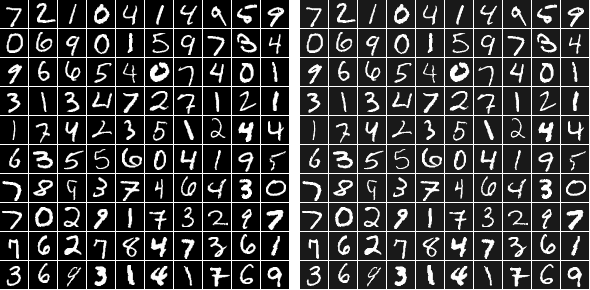

In [7]:
# define background 
background = 0.1
# change image background
changed_image = change_background(image=test_image, background=background)
# print original and changed images
print_images(test_image, changed_image, background)

The left is the 100 original MNIST images. The right is the same images but their background are changed from 0 to 0.1 using the change_background function defined above. Except background, handwritings in two image sets look no difference.

Now, if we test the neural network model that we trained before with the background changed images, you may think the test result should be the same. Since changing image background does not change human handwriting. Can you say the handwritings in the right images are different from those in the left images? Therefore, if a neural network model can recognize images in the left set, it should recognize the corespondent images in the right set. 

Let's verify it. 

First, let's run the code below. you will see two image sets are the same. Because the we set the image backgound to 0. If you look the test result displayed under the image sets, you will find it is the same as the test result in the last Epoch when we train the model.


* IPython.display


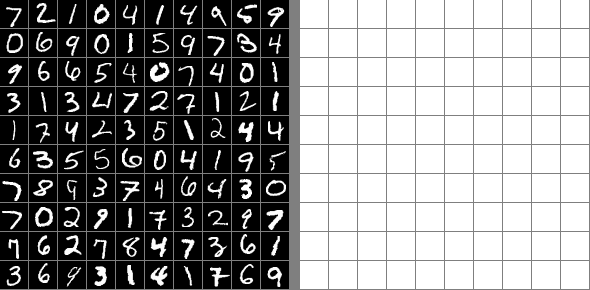

background 1.0 : 974 / 10000


In [17]:
# define background
background = 1.0 # set to 0 for no change to MNIST data
# change test image background
changed_test_image = change_background(test_image, background)
# print original and changed images
print_images(test_image, changed_test_image, background)
# prepare test data
changed_test_data = (changed_test_image, test_label)
# run test
trainer.evaluate(changed_test_data, background)

Now let's change the background value (between 0 and 1) in the above code and run again. Are they same or different? Try running the code with different background. Do you see any pattern between background and the recognized image number?

Finally, let's revert the grey-scale values of all pixels of all images and test the new images using the same nueral network model.


* IPython.display


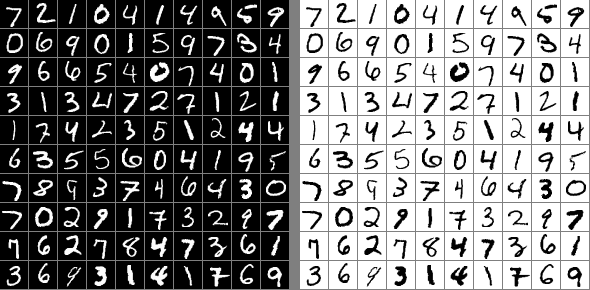

background 1.0 : 28 / 10000


In [9]:
# revert_background function has the same code as change_background function
# except it replaces two line code in change_background function with one line code
# can you find them?
def revert_background(image):
    changed_image = []
    size = len(image)
    for i in range(size):
        img = image[i].copy()
        # loop through each point of the image
        for k in range(len(img)):
            img[k] = 1 - img[k]  # code to revert grey scale
        changed_image.append(img)
    return changed_image
# revert test image background
revert_test_image = revert_background(test_image)
# print original and revert images
print_images(test_image, revert_test_image, 1.0)
# prepare test data
revert_test_data = (revert_test_image, test_label)
# run test
trainer.evaluate(revert_test_data, 1.0, 'revert')

Now let's look all test results

In [18]:
for result in trainer.sortResults():
        print("{} : {} / {}".format(result['display'], result['count'], result['sample']))

MNIST : 9392 / 10000
0.0 : 9392 / 10000
0.2 : 5476 / 10000
0.3 : 4250 / 10000
0.5 : 3064 / 10000
1.0 : 974 / 10000
Revert : 28 / 10000


Where MNIST is the test result in the last Epoch in model training. Revert is the test result when we revert all pixel values.

The results may surprise you. But it is obvious that changing test image background can significantly change test results. The lighter background is the less images can be recognized by the same neural network model.